<a href="https://colab.research.google.com/github/ugurtalas/SezgiselOtimizasyonDersNotlari/blob/main/SCO_x2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

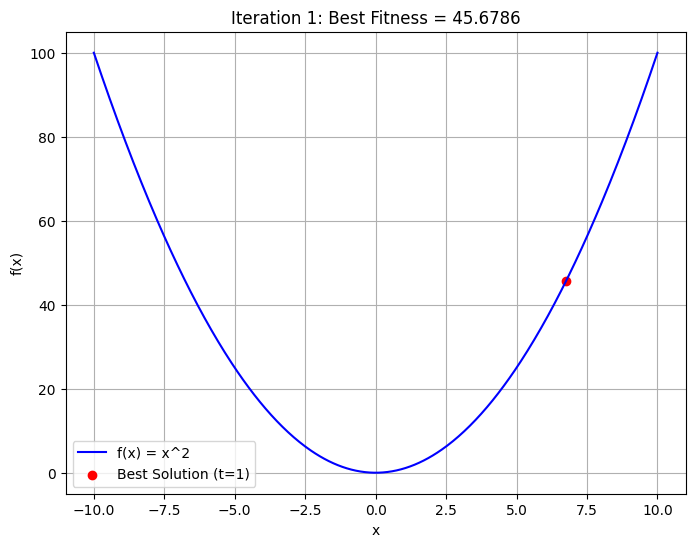

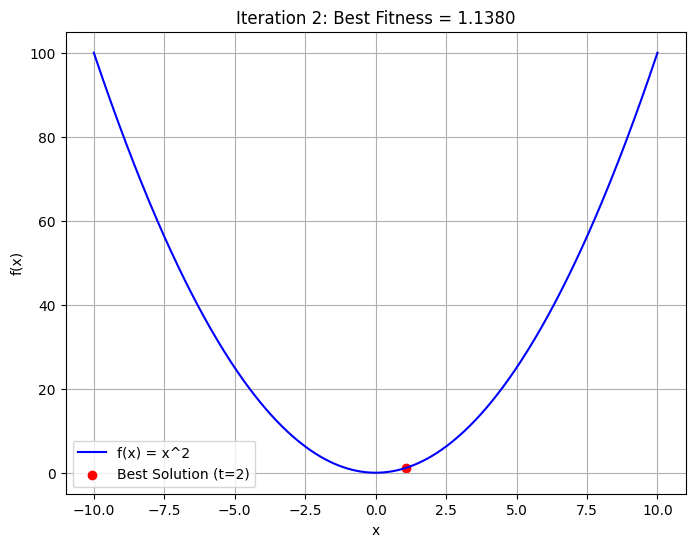

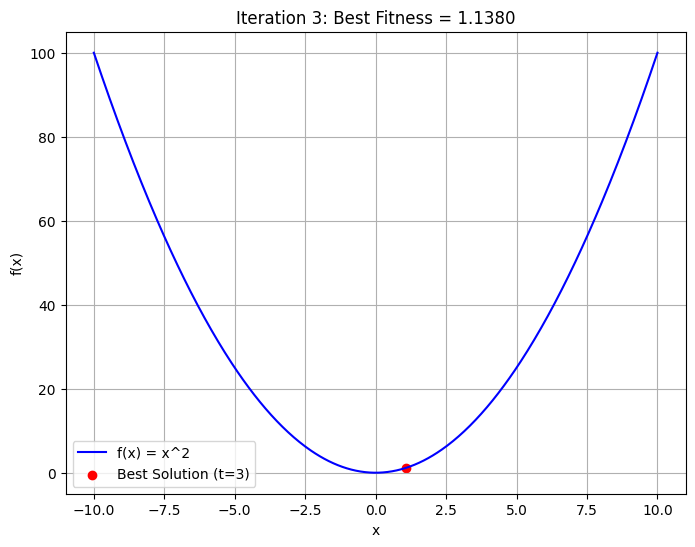

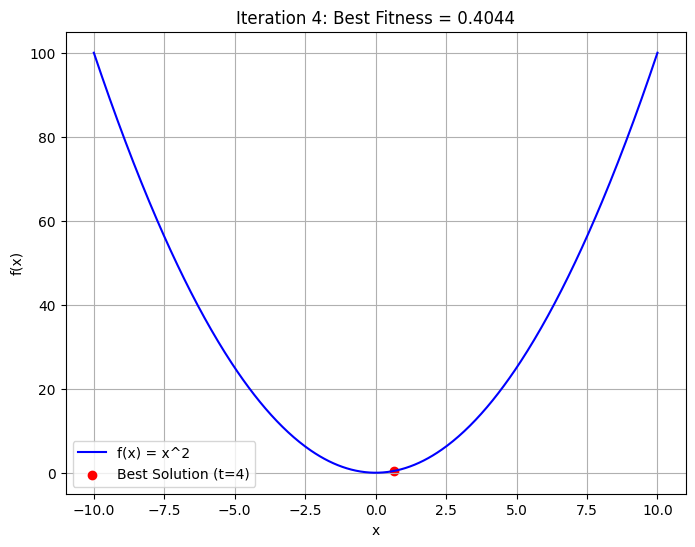

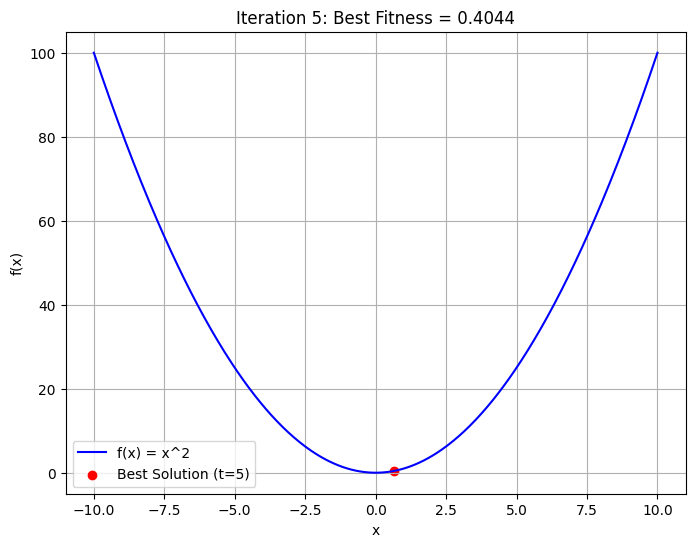

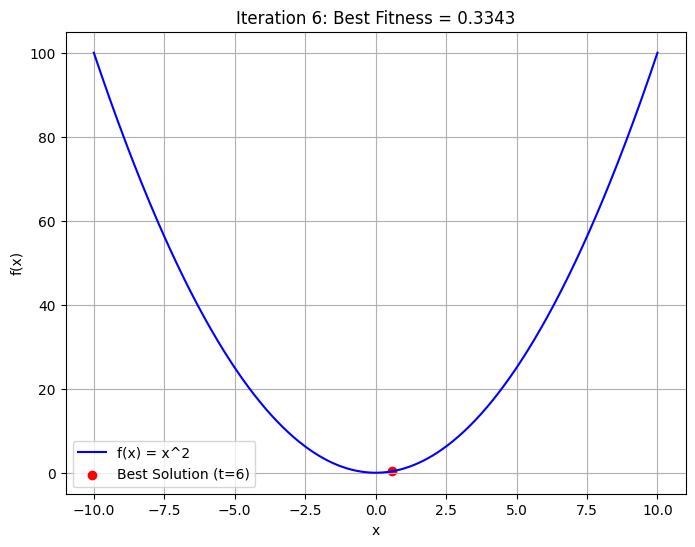

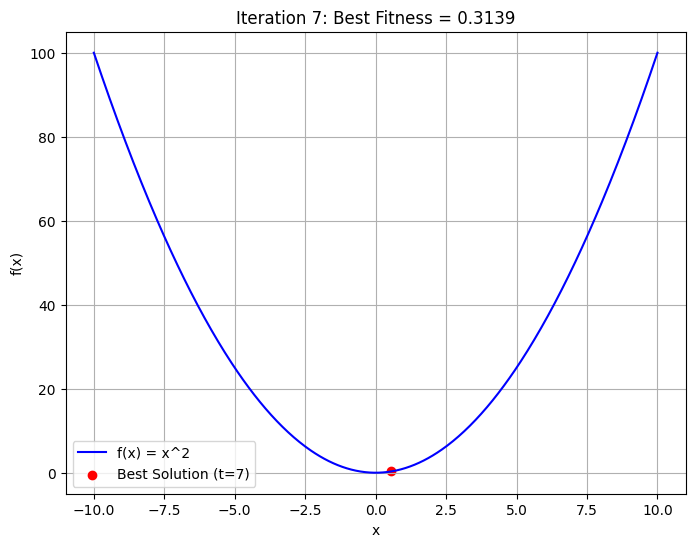

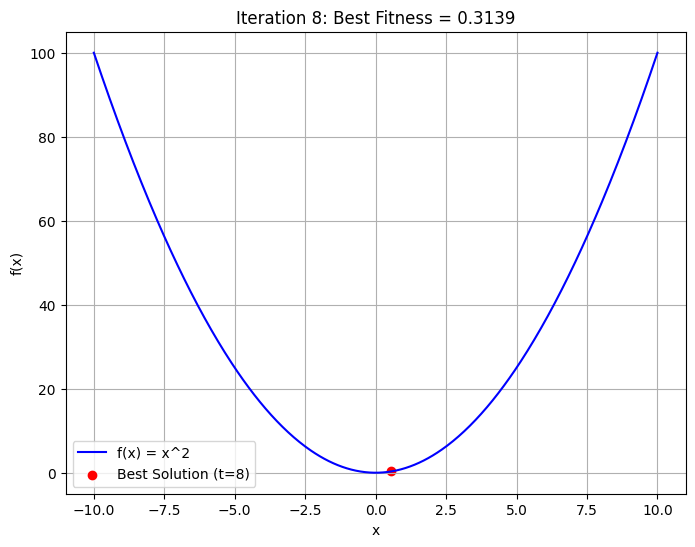

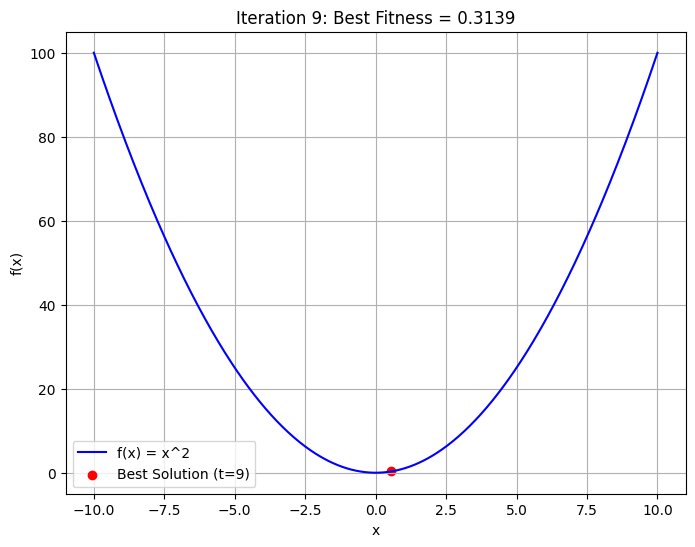

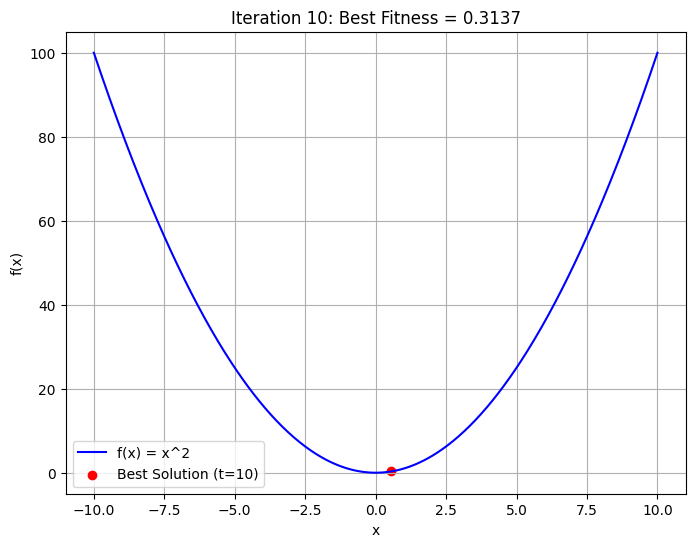

Best Fitness Values: [45.67862465  1.13797958  1.13797958  0.40441113  0.40441113  0.33431254
  0.31389703  0.31389703  0.31389703  0.31372033]
Global Best Fitness: 0.31372032792982407
Global Best Solution: [0.56010743]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Objective function for x^2
def fobj(x):
    return x**2# Objective function: x^2 (only for scalar x)

# Get_F_details function
def Get_F_details(FN):
    if FN == "x^2":
        lb = -10  # Lower bound
        ub = 10   # Upper bound
        dim = 1   # Dimension (1D function for visualization)
        return lb, ub, dim, fobj
    else:
        raise ValueError("Function not defined!")

# SCO function
def SCO(FN, T):
    lb, ub, dim, fobj = Get_F_details(FN)
    ub = np.array([ub] * dim)
    lb = np.array([lb] * dim)
    Range = ub - lb
    P = 0  # P=0 indicates no fitness improvement, P=1 means fitness is improved

    # Initialize a random candidate solution
    S = np.array([lb[i] + np.random.rand() * (ub[i] - lb[i]) for i in range(dim)])  # S is the global best position
    BF = fobj(S[0])  # Fitness of the global best position
    POO = 0  # Initial counter to count unsuccessful fitness improvements
    m = 5  # Number of unsuccessful attempts to improve fitness
    alpha = 1000  # Number of function evaluations in the first phase
    b = 2.4

    Best_Fitness = np.zeros(T)  # To store the best fitness over iterations

    # Visualization setup
    x_plot = np.linspace(lb[0], ub[0], 500)
    y_plot = fobj(x_plot)

    for t in range(1, T + 1):
        w_t = np.exp(-((b * t / T) ** b))  # Equation (3) in the paper
        if t > alpha and P == 0:
            POO += 1  # Counter for unsuccessful fitness improvements

        K = np.random.rand()
        x = np.zeros(dim)
        for j in range(dim):
            EE = w_t * K * Range[j]

            if t < alpha:
                if np.random.rand() < 0.5:
                    x[j] = S[j] + w_t * abs(S[j])
                else:  # Equation (2)
                    x[j] = S[j] - w_t * abs(S[j])
            else:
                if POO == m:
                    POO = 0  # Reset counter
                    if np.random.rand() < 0.5:
                        x[j] = S[j] + np.random.rand() * Range[j]
                    else:  # Equation (5)
                        x[j] = S[j] - np.random.rand() * Range[j]
                else:
                    if np.random.rand() < 0.5:
                        x[j] = S[j] + EE
                    else:  # Equation (4)
                        x[j] = S[j] - EE

            # Check if a dimension of the candidate solution goes out of boundaries
            if x[j] > ub[j]:
                x[j] = S[j]  # Equation (6)
            if x[j] < lb[j]:
                x[j] = S[j]

        # Evaluate the fitness of the newly generated candidate solution
        F_t = fobj(x[0])
        if F_t < BF:
            BF = F_t
            S = x
            P = 1
        else:
            P = 0

        Best_Fitness[t - 1] = BF
        gbest = S

        # Plotting current progress
        plt.figure(figsize=(8, 6))
        plt.plot(x_plot, y_plot, label="f(x) = x^2", color="blue")
        plt.scatter(S[0], BF, color="red", label=f"Best Solution (t={t})")
        plt.title(f"Iteration {t}: Best Fitness = {BF:.4f}")
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.legend()
        plt.grid()
        plt.show()

    return Best_Fitness, BF, gbest

# Call SCO for x^2
FN = "x^2"
T = 10  # Reduced to 10 iterations for visualization
Best_Fitness, BF, gbest = SCO(FN, T)

# Output results
print("Best Fitness Values:", Best_Fitness)
print("Global Best Fitness:", BF)
print("Global Best Solution:", gbest)
